# Homework 5
## INF 552: Machine Learning for Data Informatics
### Jungho Choi (junghoch@usc.edu)

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.svm import SVC 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import hamming_loss, accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### 1.Multi-class and Multi-Label Classification Using Support Vector Machines

(a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [8]:
frog_data = pd.read_csv("/Users/choi/usc/inf552/hw5/MFCCs_data/Frogs_MFCCs.csv")
split_data = train_test_split(frog_data, train_size = 0.7)
train = split_data[0]
test = split_data[1]

frog_data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:

- i. Research exact match and hamming score / loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

##### Exact Match Methods
- "In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true" (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [27]:
X_train = train.iloc[:,:-4]
y_train_family = pd.DataFrame(train['Family'])
y_train_genus = pd.DataFrame(train['Genus'])
y_train_species = pd.DataFrame(train['Species'])

X_test = test.iloc[:,:-4]
y_test_family = pd.DataFrame(test['Family'])
y_test_genus = pd.DataFrame(test['Genus'])
y_test_species = pd.DataFrame(test['Species'])

        - Family

In [29]:
svc = SVC()
svc.fit(X_train,y_train_family)
preds_family = svc.predict(X_test)
exact_match_family = accuracy_score(y_test_family, preds_family)
print("Exact match  : " + str(exact_match_family))

Exact match  : 0.929133858268


        - Genus

In [31]:
svc = SVC()
svc.fit(X_train,y_train_genus)
preds_genus = svc.predict(X_test)
exact_match_genus = accuracy_score(y_test_genus, preds_genus)
print("Exact match  : " + str(exact_match_genus))

Exact match  : 0.920333487726


        - Species

In [32]:
svc = SVC()
svc.fit(X_train,y_train_species)
preds_species = svc.predict(X_test)
exact_match_species = accuracy_score(y_test_species, preds_species)
print("Exact match  : " + str(exact_match_species))

Exact match  : 0.930060213062


##### Hamming Score / Loss Methods 
-  "In multiclass classification, the Hamming loss corresponds to the Hamming distance between y_true and y_pred which is similar to the Zero one loss function. However, while zero-one loss penalizes prediction sets that do not strictly match true sets, the Hamming loss penalizes individual labels. Thus the Hamming loss, upper bounded by the zero-one loss, is always between zero and one, inclusive; and predicting a proper subset or superset of the true labels will give a Hamming loss between zero and one, exclusive" (http://scikit-learn.org/stable/modules/model_evaluation.html)

        - Family

In [30]:
h_family = hamming_loss(y_test_family, preds_family)
print("Hamming loss : " + str(h_family))

Hamming loss : 0.0708661417323


        - Genus

In [33]:
h_genus = hamming_loss(y_test_genus, preds_genus)
print("Hamming loss : " + str(h_genus))

Hamming loss : 0.0796665122742


        - Species

In [34]:
h_species = hamming_loss(y_test_species, preds_species)
print("Hamming loss : " + str(h_species))

Hamming loss : 0.0699397869384


- ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to  try to solve the problem with both standardized and raw attributes and report the results.

In [11]:
k_folds = KFold(10)
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000]
gamma = [0.00001,0.0001,0.001,0.01,0.1,0.5,1,10,100]

parameters = {'estimator__C': C, 'estimator__gamma':gamma}

model = OneVsRestClassifier(SVC(tol=0.1))

X_train = train.iloc[:,:-4]
y_train_family = pd.DataFrame(train['Family'])
y_train_genus = pd.DataFrame(train['Genus'])
y_train_species = pd.DataFrame(train['Species'])

X_test = test.iloc[:,:-4]
y_test_family = pd.DataFrame(test['Family'])
y_test_genus = pd.DataFrame(test['Genus'])
y_test_species = pd.DataFrame(test['Species'])

        - Family

In [12]:
gsc = GridSearchCV(model, parameters, cv=k_folds, n_jobs=5)
gsc.fit(X_train, y_train_family)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.1, verbose=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000], 'estimator__gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
width=1/(np.sqrt(2*gsc.best_params_.get('estimator__gamma')))
print("Width of Gaussian Kernel  : " + str(width)) 

preds_family = gsc.predict(X_test)
score = accuracy_score(y_test_family, preds_family)

print("Exact match               : " + str(score))
h_family = hamming_loss(y_test_family, preds_family)
print('Hamming Loss              : ' + str(h_family))

Weight of the SVM penalty : {'estimator__C': 100, 'estimator__gamma': 1}
Best Score                : 0.992454328832
Width of Gaussian Kernel  : 0.707106781187
Exact match               : 0.98934691987
Hamming Loss              : 0.0106530801297


        - Genus 

In [14]:
gsc = GridSearchCV(model, parameters, cv=k_folds, n_jobs=5)
gsc.fit(X_train, y_train_genus)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.1, verbose=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000], 'estimator__gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
width=1/(np.sqrt(2*gsc.best_params_.get('estimator__gamma')))
print("Width of Gaussian Kernel  : " + str(width)) 

preds_genus = gsc.predict(X_test)
score_genus = accuracy_score(y_test_genus, preds_genus)

print("Exact match               : " + str(score_genus))
h_genus = hamming_loss(y_test_genus, preds_genus)
print('Hamming Loss              : ' + str(h_genus))

Weight of the SVM penalty : {'estimator__C': 10, 'estimator__gamma': 1}
Best Score                : 0.990865766481
Width of Gaussian Kernel  : 0.707106781187
Exact match               : 0.990736452061
Hamming Loss              : 0.00926354793886


        - Species

In [16]:
gsc = GridSearchCV(model, parameters, cv=k_folds, n_jobs=5)
gsc.fit(X_train, y_train_species)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.1, verbose=False),
          n_jobs=None),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 1000000], 'estimator__gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
width=1/(np.sqrt(2*gsc.best_params_.get('estimator__gamma')))
print("Width of Gaussian Kernel  : " + str(width)) 

preds_species = gsc.predict(X_test)
score_species = accuracy_score(y_test_species, preds_species)

print("Exact match               : " + str(score_species))
h_species = hamming_loss(y_test_species, preds_species)
print('Hamming Loss              : ' + str(h_species))

Weight of the SVM penalty : {'estimator__C': 10, 'estimator__gamma': 1}
Best Score                : 0.990667196187
Width of Gaussian Kernel  : 0.707106781187
Exact match               : 0.990273274664
Hamming Loss              : 0.0097267253358


        - Average

In [26]:
from __future__ import division

correct=0
wrong=0

for i in range(0,len(y_test_family)):
    if((preds_family[i]==y_test_family.iloc[i][0]) and (preds_species[i] == y_test_species.iloc[i][0]) and (preds_genus[i]==y_test_genus.iloc[i][0])):
        correct = correct + 1
    else:
        wrong = wrong + 1

avg_exact = wrong / len(y_test_family)
h_average = (h_family + h_genus + h_genus) / 3

print("Average Hamming Loss     : " + str(h_average))
print("Average exact match loss : " + str(avg_exact))

Average Hamming Loss     : 0.0097267253358
Average exact match loss : 0.0138953219083


- iii. Repeat 1(b)ii and L1-penalized SVMs. Remember to standardize the attributes

In [65]:
from sklearn.svm import LinearSVC 
k_folds = KFold(10)
parameters={'C':[0.1,0.01,1,10,100,1000,10000]}
model_l1 = LinearSVC(penalty= 'l1', dual = False)

In [66]:
from sklearn import preprocessing
df = frog_data
x = df.drop(["Family","Genus","Species"],axis=1)
x = preprocessing.normalize(x)

X_train, X_test, y_train, y_test = train_test_split(x, df.iloc[:,22:], test_size=0.3)

        - Family

In [67]:
gsc = GridSearchCV(model_l1, parameters, cv=k_folds)
gsc.fit(X_train, y_train['Family'])

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
preds_family = gsc.predict(X_test)
score = accuracy_score(y_test['Family'], preds_family)
h_family = hamming_loss(y_test['Family'], preds_family)

print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
print("Exact match               : " + str(score))
print('Hamming Loss              : ' + str(h_family))

Weight of the SVM penalty : {'C': 100}
Best Score                : 0.963661636219
Exact match               : 0.966188050023
Hamming Loss              : 0.0338119499768


        - Genus

In [70]:
gsc = GridSearchCV(model_l1, parameters, cv=k_folds)
gsc.fit(X_train, y_train['Genus'])

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
preds_genus = gsc.predict(X_test)
score_genus = accuracy_score(y_test['Genus'], preds_genus)
h_genus = hamming_loss(y_test['Genus'], preds_genus)

print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
print("Exact match               : " + str(score_genus))
print('Hamming Loss              : ' + str(h_genus))

Weight of the SVM penalty : {'C': 1000}
Best Score                : 0.974781572677
Exact match               : 0.974525243168
Hamming Loss              : 0.0254747568319


        - Species

In [72]:
gsc = GridSearchCV(model_l1, parameters, cv=k_folds)
gsc.fit(X_train, y_train['Species'])

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
preds_species = gsc.predict(X_test)
score_species = accuracy_score(y_test['Species'], preds_species)
h_species = hamming_loss(y_test['Species'], preds_species)

print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
print("Exact match               : " + str(score_species))
print('Hamming Loss              : ' + str(h_species))

Weight of the SVM penalty : {'C': 1000}
Best Score                : 0.977561556791
Exact match               : 0.98332561371
Hamming Loss              : 0.0166743862899


In [74]:
correct=0
wrong=0

for i in range(0,len(y_test_family)):
    if((preds_family[i]==y_test['Family'].iloc[i]) and (preds_species[i] == y_test['Species'].iloc[i]) and (preds_genus[i]==y_test['Genus'].iloc[i])):
        correct = correct + 1
    else:
        wrong = wrong + 1

avg_exact = wrong / len(y_test_family)
h_average = (h_family + h_genus + h_genus) / 3

print("Average Hamming Loss     : " + str(h_average))
print("Average exact match loss : " + str(avg_exact))

Average Hamming Loss     : 0.0282538212135
Average exact match loss : 0.048633626679


- iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_smote_family, y_train_smote_family = sm.fit_sample(X_train, y_train["Family"])
y_train_smote_family = pd.DataFrame(y_train_smote_family) 

X_train_smote_genus, y_train_smote_genus = sm.fit_sample(X_train, y_train["Genus"])
y_train_smote_genus = pd.DataFrame(y_train_smote_genus) 

X_train_smote_species, y_train_smote_species = sm.fit_sample(X_train, y_train["Species"])
y_train_smote_species = pd.DataFrame(y_train_smote_species) 

clf = (LinearSVC(penalty='l1', dual=False))
parameters={'C':[0.1,0.01,1,10,100,1000,10000]}

model_l1 = LinearSVC(penalty= 'l1', dual = False)

        - Family 

In [56]:
gsc = GridSearchCV(model_l1, parameters, cv=k_folds, n_jobs=5)
gsc.fit(X_train_smote_family, y_train_smote_family)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
preds_family = gsc.predict(X_test)
score = accuracy_score(y_test['Family'], preds_family)
h_family = hamming_loss(y_test['Family'], preds_family)

print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
print("Exact match               : " + str(score))
print('Hamming Loss              : ' + str(h_family))

Weight of the SVM penalty : {'C': 10000}
Best Score                : 0.951966112532
Exact match               : 0.944418712367
Hamming Loss              : 0.0555812876332


        - Genus

In [58]:
gsc = GridSearchCV(model_l1, parameters, cv=k_folds, n_jobs=5)
gsc.fit(X_train_smote_genus, y_train_smote_genus)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
preds_genus = gsc.predict(X_test)
score_genus = accuracy_score(y_test['Genus'], preds_genus)
h_genus = hamming_loss(y_test['Genus'], preds_genus)

print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
print("Exact match               : " + str(score_genus))
print('Hamming Loss              : ' + str(h_genus))

Weight of the SVM penalty : {'C': 1000}
Best Score                : 0.955661664393
Exact match               : 0.966188050023
Hamming Loss              : 0.0338119499768


        - Species

In [60]:
gsc = GridSearchCV(model_l1, parameters, cv=k_folds, n_jobs=5)
gsc.fit(X_train_smote_species, y_train_smote_species)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'C': [0.1, 0.01, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
preds_species = gsc.predict(X_test)
score_species = accuracy_score(y_test['Species'], preds_species)
h_species = hamming_loss(y_test['Species'], preds_species)

print("Weight of the SVM penalty : " + str(gsc.best_params_)) 
print("Best Score                : " + str(gsc.best_score_)) 
print("Exact match               : " + str(score_species))
print('Hamming Loss              : ' + str(h_species))

Weight of the SVM penalty : {'C': 10000}
Best Score                : 0.84871270944
Exact match               : 0.974988420565
Hamming Loss              : 0.0250115794349


        - Average

In [64]:
correct=0
wrong=0

for i in range(0,len(y_test_family)):
    if((preds_family[i]==y_test['Family'].iloc[i]) and (preds_species[i] == y_test['Species'].iloc[i]) and (preds_genus[i]==y_test['Genus'].iloc[i])):
        correct = correct + 1
    else:
        wrong = wrong + 1

avg_exact = wrong / len(y_test_family)
h_average = (h_family + h_genus + h_genus) / 3

print("Average Hamming Loss     : " + str(h_average))
print("Average exact match loss : " + str(avg_exact))

Average Hamming Loss     : 0.0410683958623
Average exact match loss : 0.0745715609078


###### Summary of Classifiers for 3 Different SVM Classifiers
- ii) Using Gaussian Kernel and OVA (one-versus-all) Classifier
    - Gives the lowest average exact match loss 
    - Gives the highest best score
- iii) L1-penalized SVM 
    - Gives the lowest average hamming loss 
- iv) L1-penalized SVM using SMOTE 
    - Gives worst performance than without SMOTE, in terms of average hamming loss and average exact match loss 


- Conclusion: 
    - For all classifiers, the exact match loss is higher than the hamming loss, which proves that the exact match is a stricter metric 
    - For all of the classifiers, Gaussian Kernel and OVA Classifier (ii) seems to be best as it give the highest best scores for all three labels 
    - L1-penalized SVM using SMOTE (iv) seems to be an inefficient method since it does not improve the performance. The L1-penalized SVM without SMOTE has a lower average hamming loss and average exact match loss than the one with SMOTE. 

- v. Extra Practice: Study the Classifier Chain method and apply it to the above problem.

- vi. Extra Practice: Research how confusion matrices, precision, recall, ROC, and AUC are defined for multi-label classification and compute them for the classifiers you trained in above.

#### 2.K-Means Clustering on a Multi-Class and Multi-Label Data Set

Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [75]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

X_data = frog_data.iloc[:,:-4]
y_Family = pd.DataFrame(frog_data['Family'])
y_Genus = pd.DataFrame(frog_data['Genus'])
y_Species = pd.DataFrame(frog_data['Species'])

k_vals = np.arange(2, 20)

s_result = [] 
for k in k_vals:
    kmeans = KMeans(n_clusters = k).fit(X_data)
    preds = kmeans.predict(X_data)
    s_score = silhouette_score(X_data, preds)
    s_result.append(s_score)
best_k = np.argmax(s_result) + 2 # since we start at 2 for k_vals
print("Best K selected using Silhouette Analysis: k = " + str(best_k))

Best K selected using Silhouette Analysis: k = 4


In [76]:
kmeans_bestk = KMeans(n_clusters = best_k).fit(X_data)
clusters = kmeans_bestk.labels_ 
cluster0 = np.argwhere(clusters == 0)
cluster1 = np.argwhere(clusters == 1)
cluster2 = np.argwhere(clusters == 2)
cluster3 = np.argwhere(clusters == 3)

    - Family

In [80]:
cluster0_fam = y_Family.iloc[cluster0.ravel()]
cluster0_fam_counts = cluster0_fam['Family'].value_counts()

cluster1_fam = y_Family.iloc[cluster1.ravel()]
cluster1_fam_counts = cluster1_fam['Family'].value_counts()

cluster2_fam = y_Family.iloc[cluster2.ravel()]
cluster2_fam_counts = cluster2_fam['Family'].value_counts()

cluster3_fam = y_Family.iloc[cluster3.ravel()]
cluster3_fam_counts = cluster3_fam['Family'].value_counts()


print("Cluster 1: ")
print(cluster0_fam_counts)
print("")
print("Cluster 2:")
print(cluster1_fam_counts)
print("")
print("Cluster 3:")
print(cluster2_fam_counts)
print("")
print("Cluster 4:")
print(cluster3_fam_counts)

Cluster 1: 
Hylidae            1248
Leptodactylidae     630
Bufonidae            66
Dendrobatidae        39
Name: Family, dtype: int64

Cluster 2:
Leptodactylidae    3467
Hylidae             101
Name: Family, dtype: int64

Cluster 3:
Hylidae            587
Leptodactylidae     21
Bufonidae            2
Name: Family, dtype: int64

Cluster 4:
Dendrobatidae      503
Leptodactylidae    302
Hylidae            229
Name: Family, dtype: int64


    - Genus

In [82]:
cluster0_gen = y_Genus.iloc[cluster0.ravel()]
cluster0_gen_counts = cluster0_gen['Genus'].value_counts()

cluster1_gen = y_Genus.iloc[cluster1.ravel()]
cluster1_gen_counts = cluster1_gen['Genus'].value_counts()

cluster2_gen = y_Genus.iloc[cluster2.ravel()]
cluster2_gen_counts = cluster2_gen['Genus'].value_counts()

cluster3_gen = y_Genus.iloc[cluster3.ravel()]
cluster3_gen_counts = cluster3_gen['Genus'].value_counts()


print("Cluster 1: ")
print(cluster0_gen_counts)
print("")
print("Cluster 2:")
print(cluster1_gen_counts)
print("")
print("Cluster 3:")
print(cluster2_gen_counts)
print("")
print("Cluster 4:")
print(cluster3_gen_counts)

Cluster 1: 
Hypsiboas        1040
Adenomera         376
Leptodactylus     254
Scinax             96
Osteocephalus      77
Rhinella           66
Ameerega           39
Dendropsophus      35
Name: Genus, dtype: int64

Cluster 2:
Adenomera        3466
Dendropsophus      86
Hypsiboas          12
Scinax              3
Leptodactylus       1
Name: Genus, dtype: int64

Cluster 3:
Hypsiboas        540
Osteocephalus     37
Adenomera         12
Scinax            10
Leptodactylus      9
Rhinella           2
Name: Genus, dtype: int64

Cluster 4:
Ameerega         503
Adenomera        296
Dendropsophus    189
Scinax            39
Leptodactylus      6
Hypsiboas          1
Name: Genus, dtype: int64


    - Species

In [83]:
cluster0_species = y_Species.iloc[cluster0.ravel()]
cluster0_species_counts = cluster0_species['Species'].value_counts()

cluster1_species = y_Species.iloc[cluster1.ravel()]
cluster1_species_counts = cluster1_species['Species'].value_counts()

cluster2_species = y_Species.iloc[cluster2.ravel()]
cluster2_species_counts = cluster2_species['Species'].value_counts()

cluster3_species = y_Species.iloc[cluster3.ravel()]
cluster3_species_counts = cluster3_species['Species'].value_counts()


print("Cluster 1: ")
print(cluster0_species_counts)
print("")
print("Cluster 2:")
print(cluster1_species_counts)
print("")
print("Cluster 3:")
print(cluster2_species_counts)
print("")
print("Cluster 4:")
print(cluster3_species_counts)

Cluster 1: 
HypsiboasCordobae         1020
AdenomeraAndre             370
LeptodactylusFuscus        254
ScinaxRuber                 96
OsteocephalusOophagus       77
Rhinellagranulosa           66
Ameeregatrivittata          39
HylaMinuta                  35
HypsiboasCinerascens        20
AdenomeraHylaedactylus       6
Name: Species, dtype: int64

Cluster 2:
AdenomeraHylaedactylus    3466
HylaMinuta                  86
HypsiboasCordobae           12
ScinaxRuber                  3
LeptodactylusFuscus          1
Name: Species, dtype: int64

Cluster 3:
HypsiboasCinerascens      452
HypsiboasCordobae          88
OsteocephalusOophagus      37
ScinaxRuber                10
LeptodactylusFuscus         9
AdenomeraHylaedactylus      6
AdenomeraAndre              6
Rhinellagranulosa           2
Name: Species, dtype: int64

Cluster 4:
Ameeregatrivittata     503
AdenomeraAndre         296
HylaMinuta             189
ScinaxRuber             39
LeptodactylusFuscus      6
HypsiboasCordobae        1
N

(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

    - Family

In [90]:
cluster1_maj_fam = np.argmax(cluster0_fam_counts) 
cluster2_maj_fam = np.argmax(cluster1_fam_counts) 
cluster3_maj_fam = np.argmax(cluster2_fam_counts) 
cluster4_maj_fam = np.argmax(cluster3_fam_counts) 

print("Majority Family in Cluster 1: " + str(cluster1_maj_fam))
print("Majority Family in Cluster 2: " + str(cluster2_maj_fam))
print("Majority Family in Cluster 3: " + str(cluster3_maj_fam))
print("Majority Family in Cluster 4: " + str(cluster4_maj_fam))

Majority Family in Cluster 1: Hylidae
Majority Family in Cluster 2: Leptodactylidae
Majority Family in Cluster 3: Hylidae
Majority Family in Cluster 4: Dendrobatidae


    - Genus

In [91]:
cluster1_maj_gen = np.argmax(cluster0_gen_counts) 
cluster2_maj_gen = np.argmax(cluster1_gen_counts) 
cluster3_maj_gen = np.argmax(cluster2_gen_counts) 
cluster4_maj_gen = np.argmax(cluster3_gen_counts) 

print("Majority Genus in Cluster 1: " + str(cluster1_maj_gen))
print("Majority Genus in Cluster 2: " + str(cluster2_maj_gen))
print("Majority Genus in Cluster 3: " + str(cluster3_maj_gen))
print("Majority Genus in Cluster 4: " + str(cluster4_maj_gen))

Majority Genus in Cluster 1: Hypsiboas
Majority Genus in Cluster 2: Adenomera
Majority Genus in Cluster 3: Hypsiboas
Majority Genus in Cluster 4: Ameerega


    - Species

In [92]:
cluster1_maj_spe = np.argmax(cluster0_species_counts) 
cluster2_maj_spe = np.argmax(cluster1_species_counts) 
cluster3_maj_spe = np.argmax(cluster2_species_counts) 
cluster4_maj_spe = np.argmax(cluster3_species_counts) 

print("Majority Species in Cluster 1: " + str(cluster1_maj_spe))
print("Majority Species in Cluster 2: " + str(cluster2_maj_spe))
print("Majority Species in Cluster 3: " + str(cluster3_maj_spe))
print("Majority Species in Cluster 4: " + str(cluster4_maj_spe))

Majority Species in Cluster 1: HypsiboasCordobae
Majority Species in Cluster 2: AdenomeraHylaedactylus
Majority Species in Cluster 3: HypsiboasCinerascens
Majority Species in Cluster 4: Ameeregatrivittata


(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance (score) between the true labels and the labels assigned by clusters.

In [96]:
(clust1_maj_fam, clust1_maj_gen, clust1_spe) = (cluster1_maj_fam, cluster1_maj_gen, cluster1_maj_spe)
(clust2_maj_fam, clust2_maj_gen, clust2_spe) = (cluster2_maj_fam, cluster2_maj_gen, cluster2_maj_spe)
(clust3_maj_fam, clust3_maj_gen, clust3_spe) = (cluster3_maj_fam, cluster3_maj_gen, cluster3_maj_spe)
(clust4_maj_fam, clust4_maj_gen, clust4_spe) = (cluster4_maj_fam, cluster4_maj_gen, cluster4_maj_spe)

print("Majority Label Triplet (family, genus, species)")
print("")
print("Cluster 1 Majority Label Triplet :" + str((clust1_maj_fam, clust1_maj_gen, clust1_spe)))
print("Cluster 2 Majority Label Triplet :" + str((clust2_maj_fam, clust2_maj_gen, clust2_spe)))
print("Cluster 3 Majority Label Triplet :" + str((clust3_maj_fam, clust3_maj_gen, clust3_spe)))
print("Cluster 4 Majority Label Triplet :" + str((clust4_maj_fam, clust4_maj_gen, clust4_spe)))

Majority Label Triplet (family, genus, species)

Cluster 1 Majority Label Triplet :('Hylidae', 'Hypsiboas', 'HypsiboasCordobae')
Cluster 2 Majority Label Triplet :('Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus')
Cluster 3 Majority Label Triplet :('Hylidae', 'Hypsiboas', 'HypsiboasCinerascens')
Cluster 4 Majority Label Triplet :('Dendrobatidae', 'Ameerega', 'Ameeregatrivittata')


##### i. Hamming Loss

In [100]:
predictions = kmeans_bestk.predict(X_data)

pred_family = pd.DataFrame(predictions, columns=['Family'])
pred_genus = pd.DataFrame(predictions, columns=['Genus'])
pred_species = pd.DataFrame(predictions, columns=['Species'])

pred_family = pred_family.replace((0,1,2,3),(clust1_maj_fam, clust2_maj_fam, clust3_maj_fam, clust4_maj_fam))
pred_genus = pred_genus.replace((0,1,2,3),(clust1_maj_gen, clust2_maj_gen, clust3_maj_gen, clust4_maj_gen))
pred_species = pred_species.replace((0,1,2,3),(clust1_spe, clust2_spe, clust3_spe, clust4_spe))

In [102]:
print("Hamming score for Family  : " + str(hamming_loss(y_Family, pred_family))) 
print("Hamming score for Genus   : " + str(hamming_loss(y_Genus, pred_genus)))
print("Hamming score for Species : " + str(hamming_loss(y_Species, pred_species)))

Hamming score for family  : 0.19318971508
Hamming score for genus   : 0.228769979152
Hamming score for species : 0.243780403058


##### ii. Monte-Carlo Simulation

In [105]:
# first get k values for the Monte-Carlo Simulation using Silhouette Analysis 
# k = 4 for all 
k_monte = [] 
for i in range(50):

    X_data = frog_data.iloc[:,:-4]
    y_Family = pd.DataFrame(frog_data['Family'])
    y_Genus = pd.DataFrame(frog_data['Genus'])
    y_Species = pd.DataFrame(frog_data['Species'])

    k_vals = np.arange(2, 20)

    s_result = [] 
    for k in k_vals:
        kmeans = KMeans(n_clusters = k).fit(X_data)
        preds = kmeans.predict(X_data)
        s_score = silhouette_score(X_data, preds)
        s_result.append(s_score)
    best_k = np.argmax(s_result) + 2 # since we start at 2 for k_vals
    k_monte.append(best_k)

In [109]:
hamming_dist_fam = [] 
hamming_dist_gen = [] 
hamming_dist_spe = [] 

for this_best_k in k_monte:
    kmeans_bestk = KMeans(n_clusters = this_best_k).fit(X_data)
    clusters = kmeans_bestk.labels_ 
    cluster0 = np.argwhere(clusters == 0)
    cluster1 = np.argwhere(clusters == 1)
    cluster2 = np.argwhere(clusters == 2)
    cluster3 = np.argwhere(clusters == 3)
    
    # family 
    cluster0_fam = y_Family.iloc[cluster0.ravel()]
    cluster0_fam_counts = cluster0_fam['Family'].value_counts()
    cluster1_fam = y_Family.iloc[cluster1.ravel()]
    cluster1_fam_counts = cluster1_fam['Family'].value_counts()
    cluster2_fam = y_Family.iloc[cluster2.ravel()]
    cluster2_fam_counts = cluster2_fam['Family'].value_counts()
    cluster3_fam = y_Family.iloc[cluster3.ravel()]
    cluster3_fam_counts = cluster3_fam['Family'].value_counts()
    
    # genus 
    cluster0_gen = y_Genus.iloc[cluster0.ravel()]
    cluster0_gen_counts = cluster0_gen['Genus'].value_counts()
    cluster1_gen = y_Genus.iloc[cluster1.ravel()]
    cluster1_gen_counts = cluster1_gen['Genus'].value_counts()
    cluster2_gen = y_Genus.iloc[cluster2.ravel()]
    cluster2_gen_counts = cluster2_gen['Genus'].value_counts()
    cluster3_gen = y_Genus.iloc[cluster3.ravel()]
    cluster3_gen_counts = cluster3_gen['Genus'].value_counts()
    
    # species 
    cluster0_species = y_Species.iloc[cluster0.ravel()]
    cluster0_species_counts = cluster0_species['Species'].value_counts()
    cluster1_species = y_Species.iloc[cluster1.ravel()]
    cluster1_species_counts = cluster1_species['Species'].value_counts()
    cluster2_species = y_Species.iloc[cluster2.ravel()]
    cluster2_species_counts = cluster2_species['Species'].value_counts()
    cluster3_species = y_Species.iloc[cluster3.ravel()]
    cluster3_species_counts = cluster3_species['Species'].value_counts()
    
    # get majority for each cluster 
    
    # majority family 
    cluster1_maj_fam = np.argmax(cluster0_fam_counts) 
    cluster2_maj_fam = np.argmax(cluster1_fam_counts) 
    cluster3_maj_fam = np.argmax(cluster2_fam_counts) 
    cluster4_maj_fam = np.argmax(cluster3_fam_counts) 
    
    # majority genus 
    cluster1_maj_gen = np.argmax(cluster0_gen_counts) 
    cluster2_maj_gen = np.argmax(cluster1_gen_counts) 
    cluster3_maj_gen = np.argmax(cluster2_gen_counts) 
    cluster4_maj_gen = np.argmax(cluster3_gen_counts) 
    
    # majority species 
    cluster1_maj_spe = np.argmax(cluster0_species_counts) 
    cluster2_maj_spe = np.argmax(cluster1_species_counts) 
    cluster3_maj_spe = np.argmax(cluster2_species_counts) 
    cluster4_maj_spe = np.argmax(cluster3_species_counts) 
    
    (clust1_maj_fam, clust1_maj_gen, clust1_spe) = (cluster1_maj_fam, cluster1_maj_gen, cluster1_maj_spe)
    (clust2_maj_fam, clust2_maj_gen, clust2_spe) = (cluster2_maj_fam, cluster2_maj_gen, cluster2_maj_spe)
    (clust3_maj_fam, clust3_maj_gen, clust3_spe) = (cluster3_maj_fam, cluster3_maj_gen, cluster3_maj_spe)
    (clust4_maj_fam, clust4_maj_gen, clust4_spe) = (cluster4_maj_fam, cluster4_maj_gen, cluster4_maj_spe)
    
    
    predictions = kmeans_bestk.predict(X_data)
    pred_family = pd.DataFrame(predictions, columns=['Family'])
    pred_genus = pd.DataFrame(predictions, columns=['Genus'])
    pred_species = pd.DataFrame(predictions, columns=['Species'])
    
    pred_family = pred_family.replace((0,1,2,3),(clust1_maj_fam, clust2_maj_fam, clust3_maj_fam, clust4_maj_fam))
    pred_genus = pred_genus.replace((0,1,2,3),(clust1_maj_gen, clust2_maj_gen, clust3_maj_gen, clust4_maj_gen))
    pred_species = pred_species.replace((0,1,2,3),(clust1_spe, clust2_spe, clust3_spe, clust4_spe))
    
    hamming_dist_fam.append(hamming_loss(y_Family, pred_family))
    hamming_dist_gen.append(hamming_loss(y_Genus, pred_genus))
    hamming_dist_spe.append(hamming_loss(y_Species, pred_species))

In [113]:
print("Results for the Monte-Carlo Simulation: ")
print("Average Hamming Distance and Standard Deviation of 50 Hamming Distances")
print("")
print("Family:")
print("Average Hamming Distance: " + str(np.mean(hamming_dist_fam)))
print("Standard Deivation: " + str(np.std(hamming_dist_fam)))
print("")
print("Genus:")
print("Average Hamming Distance: " + str(np.mean(hamming_dist_gen)))
print("Standard Deivation: " + str(np.std(hamming_dist_gen)))
print("")
print("Species:")
print("Average Hamming Distance: " + str(np.mean(hamming_dist_spe)))
print("Standard Deivation: " + str(np.std(hamming_dist_spe)))

Results for the Monte-Carlo Simulation: 
Average Hamming Distance and Standard Deviation of 50 Hamming Distances

Family:
Average Hamming Distance: 0.190612925643
Standard Deivation: 0.00807638971338

Genus:
Average Hamming Distance: 0.232339124392
Standard Deivation: 0.00866566776216

Species:
Average Hamming Distance: 0.249578874218
Standard Deivation: 0.015749936161


#### 3.ISLR 10.7.2

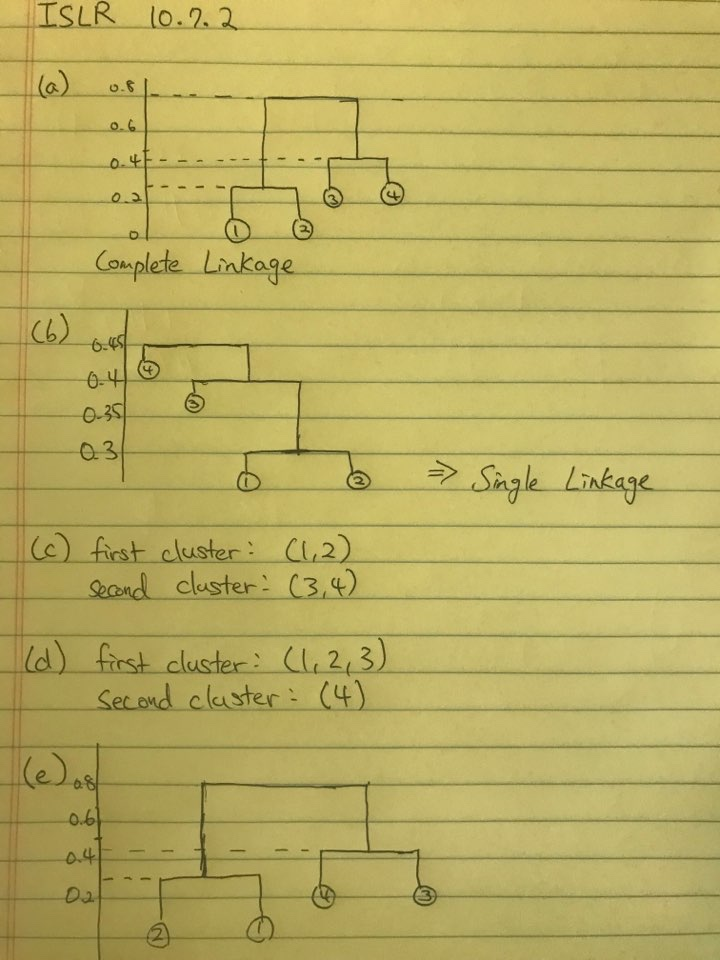

In [116]:
from IPython.display import Image
Image(filename='islr10_7_2.jpeg')

#### 4.Extra Practice: The rest of problems in 10.7.